In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import os
import warnings
import numpy as np

import torch

import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.cluster import MeanShift
from sklearn.neighbors.kde import KernelDensity
from scipy.ndimage.filters import gaussian_filter

import random

np.random.seed(37)
torch.manual_seed(37)
random.seed(37)

import warnings
warnings.filterwarnings("ignore")


rangex = (-0.35, 2.25)
rangey = (-1.3, 1.3) #(-3.0, 3.0)

def segment_points_np(p_, length, angle):
    p = np.array(p_)
    angle = np.array(angle)
    p[:,0] += length * np.cos(angle)
    p[:,1] += length * np.sin(angle)
    return p_, p

def forward_process_np(xi, lens):
    xi = xi.reshape(-1,4)
    starting_pos = np.zeros((xi.shape[0], 2))
    starting_pos[:,1] = xi[:, 0]
    A = starting_pos
    _, B = segment_points_np(A, lens[0], xi[:,1])
    _, C = segment_points_np(B, lens[1], xi[:,1] + xi[:,2])
    _, D = segment_points_np(C, lens[2], xi[:,1] + xi[:,2] + xi[:,3])
    return A, B, C, D;
    
def find_MAP(x):
    mean_shift = MeanShift()
    mean_shift.fit(x)
    centers = mean_shift.cluster_centers_
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(x)

    best_center = (None, -np.inf)
    dens = kde.score_samples(centers)
    for c,d in zip(centers, dens):
        if d > best_center[1]:
            best_center = (c.copy(), d)

    dist_to_best = np.sum((x - best_center[0])**2, axis=1)
    return np.argmin(dist_to_best)
    
def update_plot(xi_samples, xi_data, lens, color_code=0, filter_width=4., arrows=False, target_label=False):

    fig = plt.figure()
    axarr = fig.add_subplot(1,1,1) # here is where you add the subplot to f

    # if prior:
    #     color_code = 4
    # else:
    #     color_code = random.randint(0, 3)
        
    cmap = cm.tab20c
    colors = [[cmap(4*c_index), cmap(4*c_index+1), cmap(4*c_index+2)] for c_index in range(5)][color_code]
    
    lens = np.array(lens)
    xi = np.array(xi_samples)
    #y_target = y_data[0]
    
    xi0, xi1, xi2, xi3 = forward_process_np(xi, lens)

    plt.axvline(x=0, ls=':', c='gray', linewidth=.75)

    opts = {'alpha':0.05, 'scale':1, 'angles':'xy', 'scale_units':'xy', 'headlength':0, 'headaxislength':0, 'linewidth':1.0, 'rasterized':True}
    plt.quiver(xi0[:,0], xi0[:,1], (xi1-xi0)[:,0], (xi1-xi0)[:,1], **{'color': colors[0], **opts})
    plt.quiver(xi1[:,0], xi1[:,1], (xi2-xi1)[:,0], (xi2-xi1)[:,1], **{'color': colors[1], **opts})
    plt.quiver(xi2[:,0], xi2[:,1], (xi3-xi2)[:,0], (xi3-xi2)[:,1], **{'color': colors[2], **opts})
    
    exemplar_color = colors[0] * np.array([.5, .5, .5, 1])
    A, B, C, D = forward_process_np(xi_data, lens)
    plt.plot([A[0,0], B[0,0], C[0,0]],
             [A[0,1], B[0,1], C[0,1]],
                     '-', color=exemplar_color, linewidth=1, zorder=4)
    ground_truth = plt.arrow(C[0,0], C[0,1],
          D[0,0] - C[0,0], D[0,1] - C[0,1],
         color=exemplar_color, linewidth=1, head_width=0.05, head_length=0.04, overhang=0.1, length_includes_head=True, zorder=4, label="ground truth")
    plt.scatter([A[0,0],], [A[0,1],],
            s=100, marker='s', linewidth=1, edgecolors=exemplar_color, facecolors='white', zorder=3)
    plt.scatter([A[0,0], B[0,0], C[0,0]],
                [A[0,1], B[0,1], C[0,1]],
                    s=10, linewidth=1, edgecolors=exemplar_color, facecolors='white', zorder=5)

    plt.xlim(*rangex); plt.ylim(*rangey)


/Users/sharmila/anaconda3/envs/py36_tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
lens=[0.5, 0.5, 1.0]
sigmas=[0.25, 0.5, 0.5, 0.5]
sigmas = np.array(sigmas)

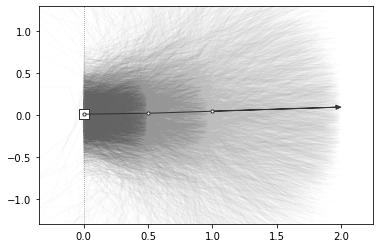

In [3]:
N = 4000
xi_samples = np.random.randn(N, 4) * sigmas
xi_data = xi_samples[find_MAP(xi_samples)]
update_plot(xi_samples, xi_data, lens, color_code=4)
plt.savefig('prior_plot'+'.png', dpi=300)

In [13]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import os
import warnings
import numpy as np

import torch

import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.cluster import MeanShift
from sklearn.neighbors.kde import KernelDensity
from scipy.ndimage.filters import gaussian_filter

import random

np.random.seed(37)
torch.manual_seed(37)
random.seed(37)

import warnings
warnings.filterwarnings("ignore")


rangex = (-0.35, 1.5)
rangey = (-0.5, 1.5) #(-3.0, 3.0)

def segment_points_np(p_, length, angle):
    p = np.array(p_)
    angle = np.array(angle)
    p[:,0] += length * np.cos(angle)
    p[:,1] += length * np.sin(angle)
    return p_, p

def forward_process_np(xi, lens):
    xi = xi.reshape(-1,4)
    starting_pos = np.zeros((xi.shape[0], 2))
    starting_pos[:,1] = xi[:, 0]
    A = starting_pos
    _, B = segment_points_np(A, lens[0], xi[:,1])
    _, C = segment_points_np(B, lens[1], xi[:,1] + xi[:,2])
    _, D = segment_points_np(C, lens[2], xi[:,1] + xi[:,2] + xi[:,3])
    return A, B, C, D;
    
def update_plot(xi_data, lens, color_code=0, filter_width=4., arrows=False, target_label=False):

    fig = plt.figure()
    axarr = fig.add_subplot(1,1,1) # here is where you add the subplot to f

    # if prior:
    #     color_code = 4
    # else:
    #     color_code = random.randint(0, 3)
        
    cmap = cm.tab20c
    colors = [[cmap(4*c_index), cmap(4*c_index+1), cmap(4*c_index+2)] for c_index in range(5)][color_code]
    
    lens = np.array(lens)

    plt.axvline(x=0, ls=':', c='gray', linewidth=.75)
    
    exemplar_color = colors[0] * np.array([.5, .5, .5, 1])
    A, B, C, D = forward_process_np(xi_data, lens)
    plt.plot([A[0,0], B[0,0], C[0,0]],
             [A[0,1], B[0,1], C[0,1]],
                     '-', color=exemplar_color, linewidth=1, zorder=4)
    ground_truth = plt.arrow(C[0,0], C[0,1],
          D[0,0] - C[0,0], D[0,1] - C[0,1],
         color=exemplar_color, linewidth=1, head_width=0.05, head_length=0.04, overhang=0.1, length_includes_head=True, zorder=4, label="ground truth")
    plt.scatter([A[0,0],], [A[0,1],],
            s=100, marker='s', linewidth=1, edgecolors=exemplar_color, facecolors='white', zorder=3)
    plt.scatter([A[0,0], B[0,0], C[0,0]],
                [A[0,1], B[0,1], C[0,1]],
                    s=10, linewidth=1, edgecolors=exemplar_color, facecolors='white', zorder=5)

    plt.xlim(*rangex); plt.ylim(*rangey)


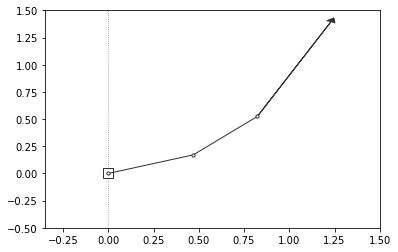

In [14]:
lens=[0.5, 0.5, 1.0]
xi_data = np.array([0., 20*3.14/180, 25*3.14/180, 20*3.14/180])
update_plot(xi_data, lens, color_code=4)
plt.savefig('schematic_plot'+'.png', dpi=300)